# Optimization with Genetic Algorithms

In this example we are going to use **Pymoo** package that includes many algorithms for single-objective and multi-objective optimization, and tools for visualization as well.

Let's to start by creating some test function as objective function for single-objective optimization.

## Single-objective optimization

### Rastringin function

The rastringin function is a non-convex function, was first proposed by Rastringin in 1974 as a 2-dimensional function, after that has been generalized by Rudolph.

Given an n-dimensional vector $X = [x_1, x_2, \ldots, x_n]^T$ the Rastringin function is defined by:

$$f(X) = \omega n + \sum_{i=1}^n [x_i^2 - \omega\cos{(2\pi x_i)}]$$

where $\omega=10$ and $x_i \in [-5.12, 5.12]$.

The global minimum is at $X = 0$ where $f(X) = 0$

Let's make some importation to create the function and visualizing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rastringinFunction(X):

    A = 10 * len(X)
    B = np.power(X, 2) - 10 * np.cos(2 * np.pi * X)

    f = A + np.sum(B)

    return f

In [3]:
def rastringinFunction2D(x_1, x_2):
    A = 10 * 2
    B = x_1**2 - 10 * np.cos(2 * np.pi * x_1)
    C = x_2**2 - 10 * np.cos(2 * np.pi * x_2)

    f = A + B + C

    return f

Now we need some $x_1$ and $x_2$ values for evaluating the function and plot it

In [4]:
# Create some points
x_1 = np.linspace(-5.12, 5.12, 1000)
x_2 = np.linspace(-5.12, 5.12, 1000)

# Create a mesh to plot the surface
X1, X2 = np.meshgrid(x_1, x_2)

# Compute f(X)
Z = rastringinFunction2D(X1, X2)

Let's visualize the function

In [5]:
def plot2D(X1, X2, Z, ax, optimum=None):

    ax.contour(X1, X2, Z, levels=10, colors='white', linewidths=0.6)
    countoursColor = ax.contourf(X1, X2, Z, levels=40)

    cbar = plt.colorbar(countoursColor)
    cbar.set_label(r'$f(x, y)$', rotation=0, ha='left', fontsize=14)

    if optimum is not None:
        ax.scatter(optimum[0], optimum[1], c='red', edgecolors='black', linewidths=0.5, s=40)

    ax.set_xlabel(r'$x_1$', fontsize=14)
    ax.set_ylabel(r'$x_2$', fontsize=14)

In [6]:
from mpl_toolkits.mplot3d import Axes3D

def plot3D(X1, X2, Z, ax):
    ax.plot_surface(X1, X2, Z, cmap='viridis')

    # set the axes labels
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
    ax.set_zlabel('Z')

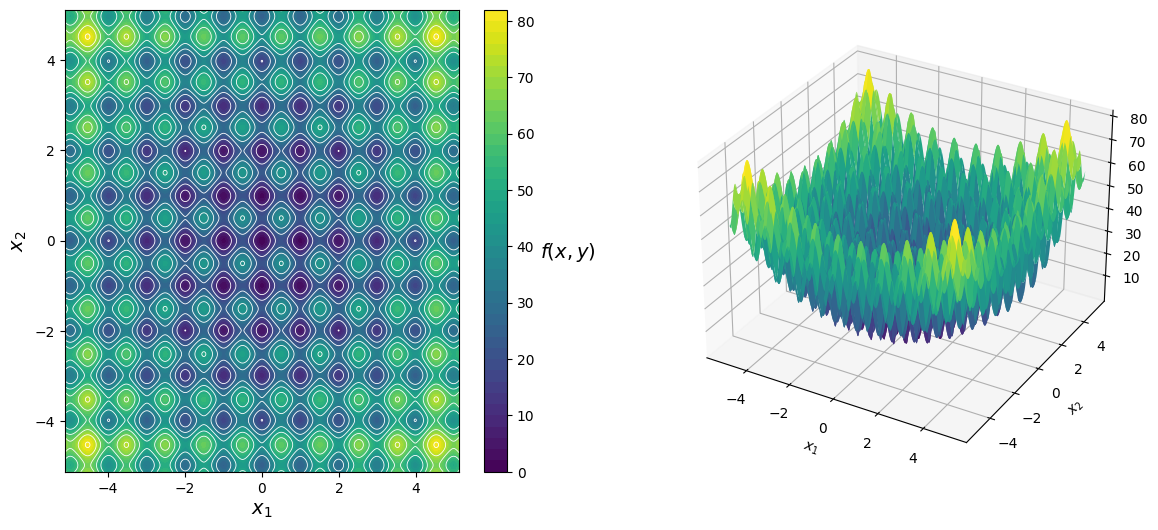

In [7]:
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(1, 2, 1)
plot2D(X1, X2, Z, ax=ax, optimum=None)

ax = fig.add_subplot(1, 2, 2, projection='3d')
plot3D(X1, X2, Z, ax=ax)

### Defining the problem using **Pymoo**

**Pymoo** requires the optimization problem to be defined as an object, to do that we use the class `ElementWise` from `pymoo.core.problem`:

In [8]:
from pymoo.core.problem import ElementwiseProblem

# Define here the problem
class rastringinProblem(ElementwiseProblem):

    def __init__(self, numberVariables):
        """ 
        n_obj: Number of objectives (for single-objetive n_obj=1)
        xl: Lower boundary (-5.12)
        xu: Upper boundary (5.12) 
        """
        xl = -5.12 * np.ones(numberVariables)
        xu = 5.12 * np.ones(numberVariables)

        super().__init__(n_var=numberVariables, n_eq_constr=0, n_ieq_constr=0, n_obj=1, xl=xl, xu=xu)

    def _evaluate(self, x, out, *args, **kwargs):
        """Here we write the objective function and constraints"""
        out['F'] = rastringinFunction(x)

In [9]:
nVariables = 2

# Instantiate the problem
problem = rastringinProblem(nVariables)

### Selecting the algorithm

**Pymoo** offers many algorithms for both single objective optimization and multi-objective optimization.

#### Single-objective algorithms

* Genetic Algorithm -> **GA**
* Differential Evolution -> **DE**
* Pattern Search -> **PatternSearch**

In this problem we're going to use a Genetic Algorithm with Tournament Selection, Simulated Binary Crossover (SBX) and Polynomial Mutation. The **GA** class from `pymoo.algorithms.soo.nonconvex.ga` has already included this genetic operators.

In [10]:
from pymoo.algorithms.soo.nonconvex.ga import GA

# Hyperparameters of the Genectic Algorithm
populationSize = 30


algorithm = GA(
    pop_size=populationSize,
    eliminate_duplicates=True
)

### Termination criterion

For this problem the termination criterion will be when evolutive process reaches 100 generations

In [11]:
from pymoo.termination import get_termination

numberGenerations = 100

termination = get_termination('n_gen', numberGenerations)

### Optimization process

To start the optimization process we use the `minimize()` function that receives as paramaters the **problem**, **algorithm**, and others paramaters such as the termination criterion, the seed to make reproducibility, etc

In [12]:
from pymoo.optimize import minimize

results = minimize(
    problem, 
    algorithm,
    termination,
    verbose=True,
    seed=42,
    save_history=True
)

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       30 |  3.736026E+01 |  9.0433712326
     2 |       60 |  2.059444E+01 |  5.1844941915
     3 |       90 |  1.618457E+01 |  5.1844941915
     4 |      120 |  1.122812E+01 |  4.1754903045
     5 |      150 |  8.4217514590 |  2.8804431754
     6 |      180 |  7.3377294756 |  2.6005706556
     7 |      210 |  6.6898923975 |  2.6005706556
     8 |      240 |  6.0611942099 |  1.5337484351
     9 |      270 |  4.8998589525 |  1.4283386022
    10 |      300 |  4.0726289545 |  1.0615685844
    11 |      330 |  3.7677112195 |  1.0615685844
    12 |      360 |  3.0812097692 |  1.0615685844
    13 |      390 |  2.3925089559 |  1.0615685844
    14 |      420 |  1.9050694174 |  1.0615685844
    15 |      450 |  1.6644729583 |  1.0615685844
    16 |      480 |  1.3742625248 |  1.0615685844
    17 |      510 |  1.2364002257 |  1.0227787645
    18 |      540 |  1.1892110986 |  1.0189776119
    19 |      570 |  1.1323473936 |  1.0111262360


### Show the results

In [13]:
X, F = results.X, results.F

X_analytical = np.zeros(nVariables)

print('Results: \n')
print(f'Population size: {populationSize}, Number of generations: {numberGenerations} \n')
print('Minimum:')
print(f'Analytical: 0.00, GA: {F[0]:.6f}')
print('X')
print(f'Analytical: {X_analytical}, GA: {X}')

Results: 

Population size: 30, Number of generations: 100 

Minimum:
Analytical: 0.00, GA: 0.000021
X
Analytical: [0. 0.], GA: [-1.68573130e-07 -3.27819455e-04]


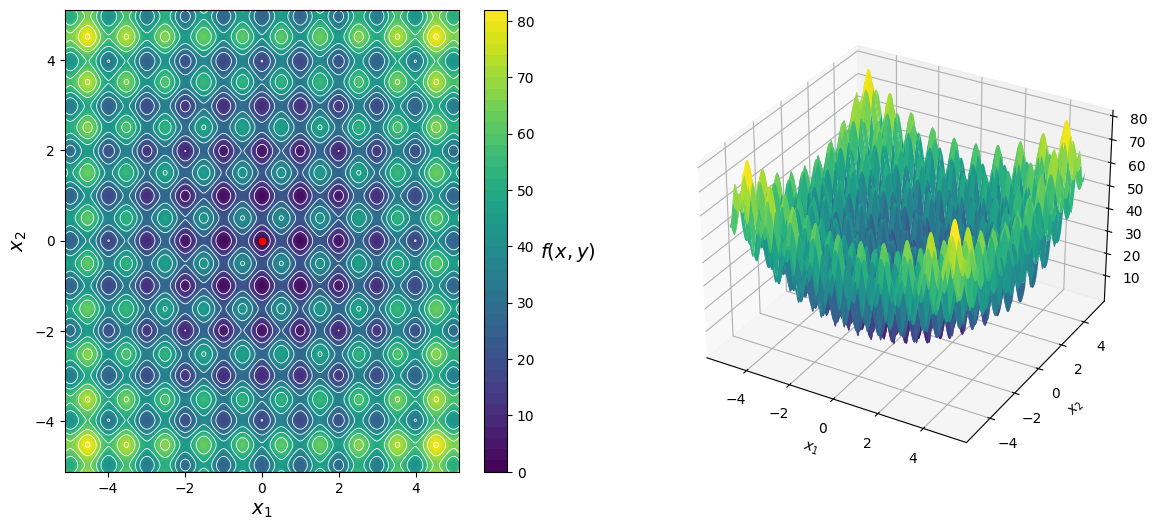

In [14]:
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(1, 2, 1)
plot2D(X1, X2, Z, ax=ax, optimum=X)

ax = fig.add_subplot(1, 2, 2, projection='3d')
plot3D(X1, X2, Z, ax=ax)

### Genetic Algorithm Evolution

The following plots shows the best individual in each generation, and the average fitness as well, the `results.history` list stores the complete story of the algorithm's evolution, so we can get back the information and visualize it.

In [15]:
# Get the population in each generation
population = [GA.pop for GA in results.history]

# Save the fitness of the best individual
bestFitness = [np.min(pop.get('F')) for pop in population]

# Compute the average fitness for each generation
averageFitness = [np.average(pop.get('F')) for pop in population]

# Number of generations
generation = np.arange(1, len(population) + 1)

Text(0.5, 0.98, 'Evolutionary Process')

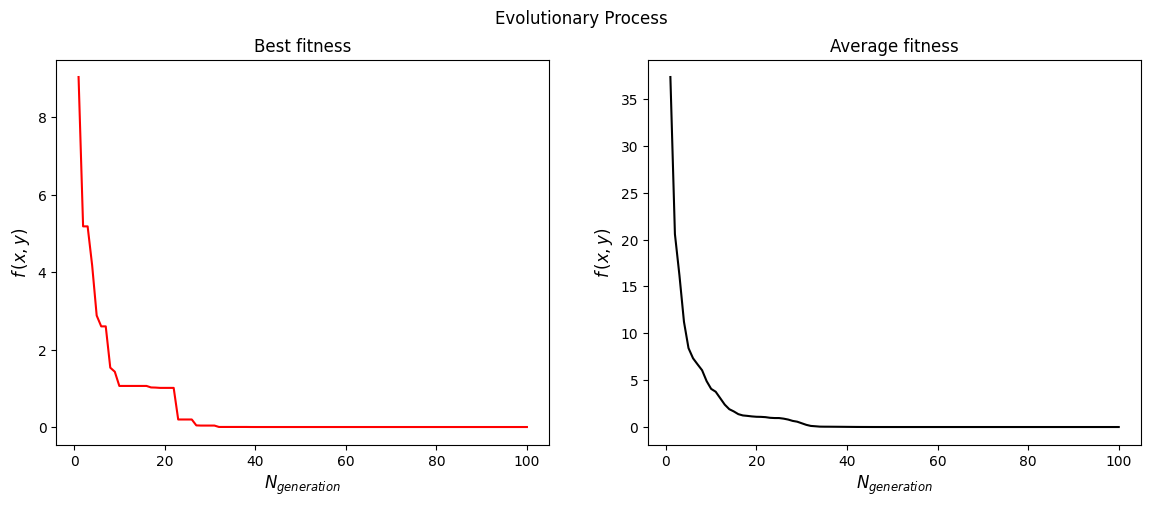

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(generation, bestFitness, color='red')
ax1.set_xlabel(r'$N_{generation}$', fontsize=12)
ax1.set_ylabel(r'$f\,(x, y)$', fontsize=12)
ax1.set_title('Best fitness')

ax2.plot(generation, averageFitness, color='black')
ax2.set_xlabel(r'$N_{generation}$', fontsize=12)
ax2.set_ylabel(r'$f\,(x, y)$', fontsize=12)
ax2.set_title('Average fitness')

plt.suptitle('Evolutionary Process')

### Hölder table function

This function take two variables as arguments and is defined by:

$$f(x, y) = - \left| \sin{x} \cos{y} \exp \left( \left| 1 - \frac{\sqrt{x^2 + y^2}}{\pi} \right| \right) \right|$$

For $-10 \leq x, \,y \leq 10$ this function has four minimums:

$$
   \text{Min} = 
   \begin{cases}
        f(8.05502, 9.66459) = -19.2085 \\
        f(-8.05502, 9.66459) = -19.2085 \\
        f(8.05502, -9.66459) = -19.2085 \\
        f(-8.05502, -9.66459) = -19.2085
   \end{cases}
$$

In [17]:
import numpy as np
import matplotlib.pyplot

In [18]:
def holderFunction(x, y):

    A = np.sqrt(x**2 + y**2)
    B = 1 - (A / np.pi)
    C = np.exp(np.abs(B))
    D = np.sin(x) * np.cos(y) * C

    f = - np.abs(D)

    return f

In [19]:
# Create some points
x_1 = np.linspace(-10, 10, 1000)
x_2 = np.linspace(-10, 10, 1000)

# Create a mesh to plot the surface
X1, X2 = np.meshgrid(x_1, x_2)

# Compute f(x, y)
Z = holderFunction(X1, X2)

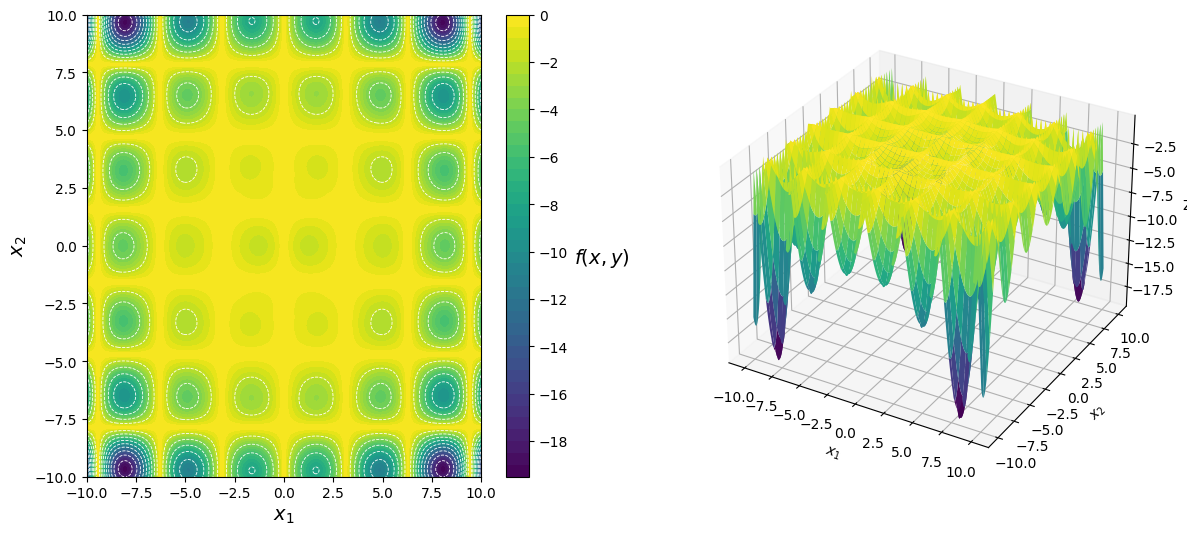

In [20]:
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(1, 2, 1)
plot2D(X1, X2, Z, ax=ax, optimum=None)

ax = fig.add_subplot(1, 2, 2, projection='3d')
plot3D(X1, X2, Z, ax=ax)

### Defining the problem

In [21]:
from pymoo.core.problem import ElementwiseProblem

class HolderProblem(ElementwiseProblem):

    def __init__(self):
        """
        xl: Lower boundary (x1, x2 = -10)
        xu: Upper boundary (x1, x2 = 10)
        n_var: Number of variables (2)
        n_obj: Number of objectives (1)
        """
        xl = -10 * np.ones(2)
        xu = 10 * np.ones(2)
        numberVariables = 2

        super().__init__(n_var=numberVariables,
                         n_obj = 1,
                         n_ieq_constr=0,
                         n_eq_constr=0,
                         xl=xl,
                         xu=xu)
        
    def _evaluate(self, x, out, *args, **kwargs):
        """
        This function compute the performance and the constraints for each individual
        out['F']: Fitness
        out['G']: Constraints (if n_ieq_constr or n_eq_constr > 0)
        """
        out['F'] = holderFunction(x[0], x[1])

Let's create an object of the class `HolderProblem`

In [22]:
problem = HolderProblem()

### Selecting the algorithm

Again a genetic algorithm is selected as optimization algorithm, but in this case we will customize the GA by selecting the following genetic operators:

* Selection -> Random Selection

In [23]:
from pymoo.operators.selection.rnd import RandomSelection
from pymoo.algorithms.soo.nonconvex.ga import GA

# Select the Random selection as operator
selection = RandomSelection()

# Population size
populationSize = 30
algorithm = GA(
    pop_size=populationSize,
    selection=selection,
    eliminate_duplicates=True
)

### Termination criterion

We can have more control of the termination criterion using `DefaulSingleObjectiveTermination`.

The `DefaulSingleOvbjectiveTermination` takes the following parameters:

* **xtol** -> Track the change in the design space, if the value is below this bound, the optimization process stops.
* **ftol** -> Use the objective space to decide whether to terminate the algorithm.
* **cvtol** -> As **xtol** and **ftol** use the constraint space as termination criterion
* **period**
* **n_max_gen** -> Maximum number of generations
* **n_max_evals** -> Maximum number of evaluations

In [24]:
from pymoo.termination.default import DefaultSingleObjectiveTermination

termination = DefaultSingleObjectiveTermination(
    xtol=1e-2,
    cvtol= 1e-6,
    ftol=1e-2,
    period=20,
    n_max_gen=100,
    n_max_evals=2000
)

### Optimization process

In [25]:
from pymoo.optimize import minimize

results = minimize(
    problem,
    algorithm,
    termination,
    seed=42,
    verbose=True,
    save_history=True
)

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       30 | -2.488954E+00 | -1.177325E+01
     2 |       60 | -4.162037E+00 | -1.177325E+01
     3 |       90 | -6.275650E+00 | -1.542646E+01
     4 |      120 | -8.003032E+00 | -1.591040E+01
     5 |      150 | -9.889693E+00 | -1.591040E+01
     6 |      180 | -1.198049E+01 | -1.893656E+01
     7 |      210 | -1.369704E+01 | -1.910494E+01
     8 |      240 | -1.528839E+01 | -1.910494E+01
     9 |      270 | -1.699112E+01 | -1.910494E+01
    10 |      300 | -1.774680E+01 | -1.910494E+01
    11 |      330 | -1.829113E+01 | -1.910494E+01
    12 |      360 | -1.855051E+01 | -1.910494E+01
    13 |      390 | -1.876461E+01 | -1.912285E+01
    14 |      420 | -1.888489E+01 | -1.912285E+01
    15 |      450 | -1.893274E+01 | -1.912285E+01
    16 |      480 | -1.901200E+01 | -1.914578E+01
    17 |      510 | -1.907144E+01 | -1.916619E+01
    18 |      540 | -1.909522E+01 | -1.916619E+01
    19 |      570 | -1.910361E+01 | -1.916619E+01


### Show the results

In [26]:
X, F = results.X, results.F
X_analytical = [[8.05502, 9.66459], [8.05502, -9.66459], [-8.05502, 9.66459], [-8.05502, -9.66459]]
print('Results: \n')
print(f'Population size: {populationSize}, Number of generations: {len(results.history)} \n')
print('Minimum:')
print(f'Analytical: -19.2085, GA: {F[0]:.6f}')
print('X')
print(f'Analytical: {X_analytical}')
print(f'GA: {X}')

Results: 

Population size: 30, Number of generations: 36 

Minimum:
Analytical: -19.2085, GA: -19.197861
X
Analytical: [[8.05502, 9.66459], [8.05502, -9.66459], [-8.05502, 9.66459], [-8.05502, -9.66459]]
GA: [8.02503578 9.67834893]


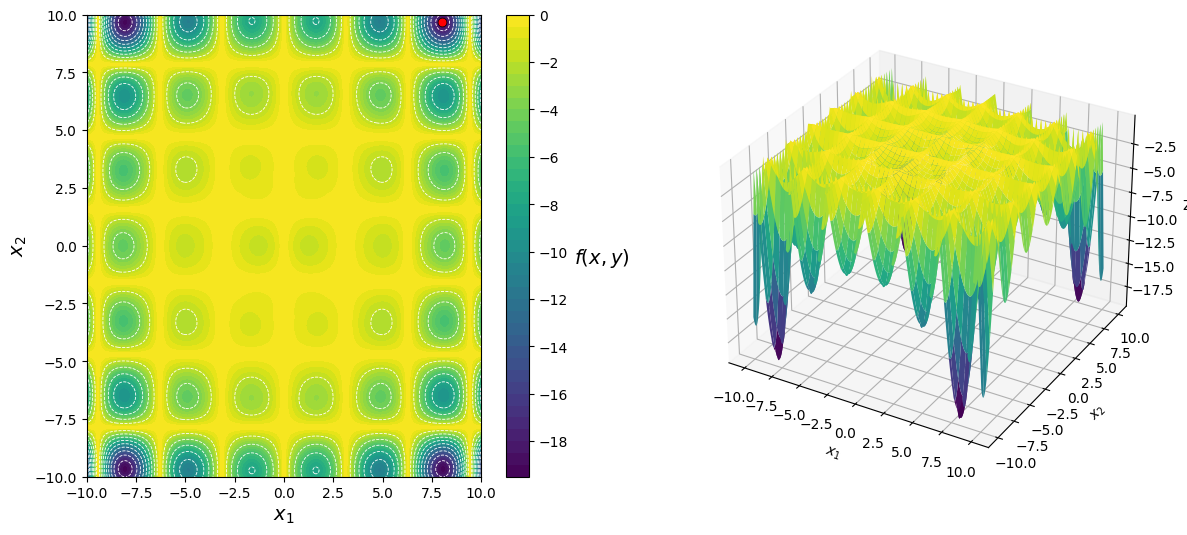

In [27]:
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(1, 2, 1)
plot2D(X1, X2, Z, ax=ax, optimum=X)

ax = fig.add_subplot(1, 2, 2, projection='3d')
plot3D(X1, X2, Z, ax=ax)

### Genetic Algorithm Evolution

The following plots shows the best individual in each generation, and the average fitness as well, the `results.history` list stores the complete story of the algorithm's evolution, so we can get back the information and visualize it.

In [28]:
# Get the population in each generation
population = [GA.pop for GA in results.history]

# Save the fitness of the best individual
bestFitness = [np.min(pop.get('F')) for pop in population]

# Compute the average fitness for each generation
averageFitness = [np.average(pop.get('F')) for pop in population]

# Number of generations
generation = np.arange(1, len(population) + 1)

Plot the best individual through the evolutionary process

Text(0.5, 0.98, 'Evolutionary Process')

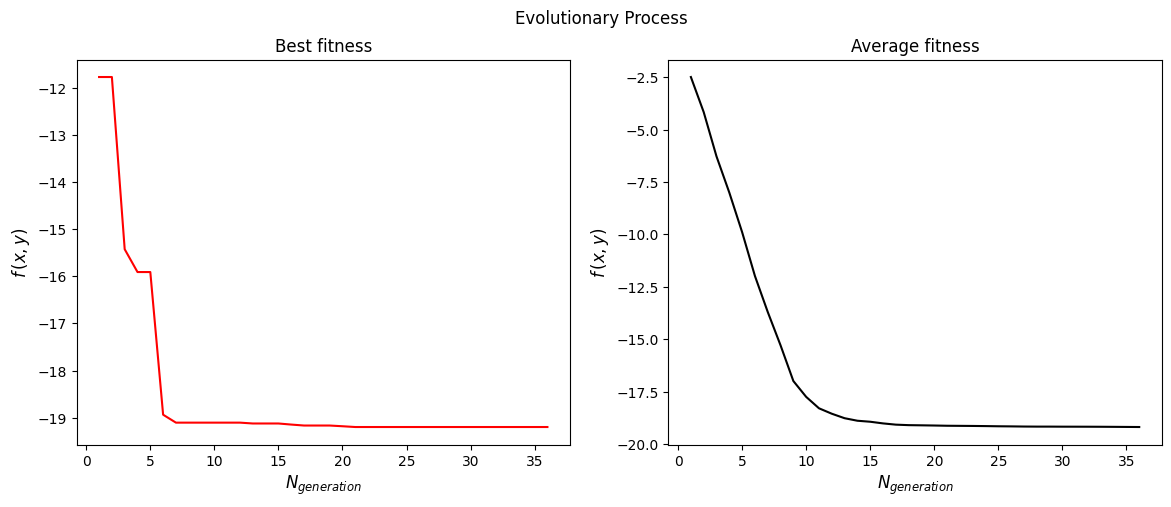

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(generation, bestFitness, color='red')
ax1.set_xlabel(r'$N_{generation}$', fontsize=12)
ax1.set_ylabel(r'$f\,(x, y)$', fontsize=12)
ax1.set_title('Best fitness')

ax2.plot(generation, averageFitness, color='black')
ax2.set_xlabel(r'$N_{generation}$', fontsize=12)
ax2.set_ylabel(r'$f\,(x, y)$', fontsize=12)
ax2.set_title('Average fitness')

plt.suptitle('Evolutionary Process')
